In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
#reading data from csv file
data1=r"D:\Journey to CSET\MyOwnSkirmishes\shProject.csv"
df=pd.read_csv(data1)
print("Data import successful")

df.head()

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#checking if there are any missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

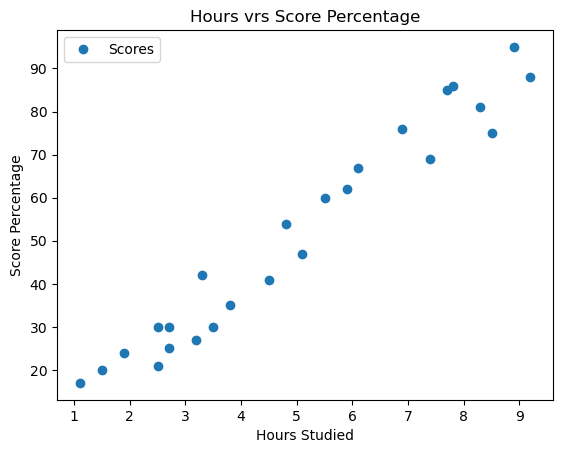

In [4]:
#plotting Hours vrs Score Percentage
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vrs Score Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Score Percentage')
plt.show()

In [5]:
#division of data into "attributes" (inputs) and "labels" (outputs).
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [6]:
#splitting the data into training and testing sets, and training the algorithm.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

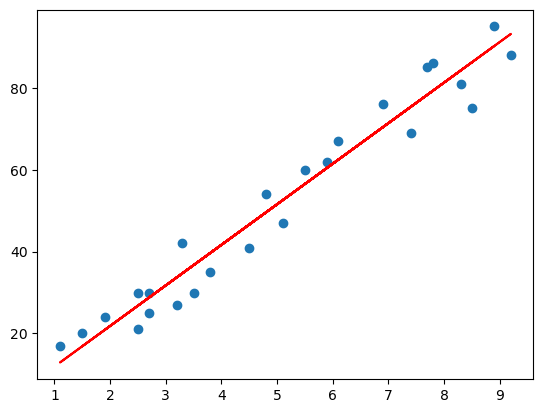

In [7]:
#plotting the regression line
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,y)
plt.plot(X,line,color='red');
plt.show()

In [8]:
#testing data
print(X_test)
#model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
#comparing actual vs predicted
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
#estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


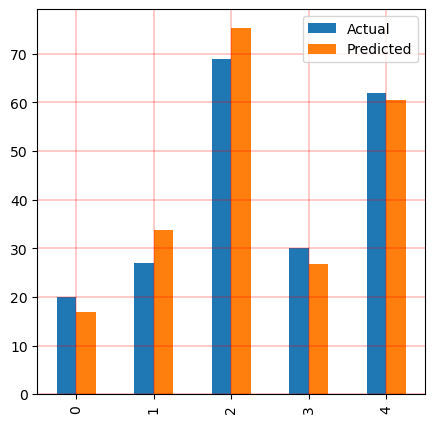

In [11]:
#plotting the Bar graph to depict the difference between the actual and predicted value
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.3', color='red')
plt.show()

In [12]:
#testing the model with our my own data
hours= 9
test=np.array([hours])
test=test.reshape(-1, 1)
own_pred=regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9
Predicted Score = 91.21406836721481


In [13]:
#different errors have been calculated to compare the model performance and predict the accuracy.
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
